In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/commentsdataset/comments.csv


In [464]:
data_df = pd.read_csv('/kaggle/input/commentsdataset/comments.csv')

In [465]:
data_df.head()

,Unnamed: 0,Comments,Category
0,0,I feel like replacing Hemsworth would be a ter...,Astrology
1,1,"""IT'S GOING TO KICK OFF IN MAY 2020""",Astrology
2,4,.......no....sorry....no. :(,Astrology
3,5,Phase 4 starts on 2020,Astrology
4,7,Corona: darling you have no idea whats possible,Astrology


In [466]:
data_df.drop('Unnamed: 0',1,inplace=True)

In [467]:
mapping_dict = {}
for idx,item in enumerate(data_df.Category.value_counts().index.to_list()):
    mapping_dict[item] = idx

In [468]:
data_df['label'] = data_df.Category.apply(lambda z: mapping_dict[z])

In [469]:
data_df.head()

,Comments,Category,label
0,I feel like replacing Hemsworth would be a ter...,Astrology,3
1,"""IT'S GOING TO KICK OFF IN MAY 2020""",Astrology,3
2,.......no....sorry....no. :(,Astrology,3
3,Phase 4 starts on 2020,Astrology,3
4,Corona: darling you have no idea whats possible,Astrology,3


In [470]:
data_df.label.value_counts()

0     256567
1     205751
2     105061
3      78274
4      49431
5      48756
6      46935
7      43054
8      41151
9      30841
10     26993
11     23507
12     14352
13     13701
14     10952
15      9766
16      8970
17      7524
18      6315
19      5937
20      5843
21      4583
22      2793
Name: label, dtype: int64

In [471]:
data_df.Comments.isna().sum()


0

In [472]:
data_df.Comments

0          I feel like replacing Hemsworth would be a ter...
1                       "IT'S GOING TO KICK OFF IN MAY 2020"
2                               .......no....sorry....no. :(
3                                     Phase 4 starts on 2020
4            Corona: darling you have no idea whats possible
                                 ...                        
1047052    Bitchhhhhhhhhh you actually travelled economy ...
1047053    Beautiful place thank you for sharing this video.
1047054      She looked STUNNING when she went to the mosque
1047055    I am so jealous of your life ðŸ˜­ so I will li...
1047056    You have to visit MOROCCO ðŸ‡²ðŸ‡¦ THE MOST OU...
Name: Comments, Length: 1047057, dtype: object

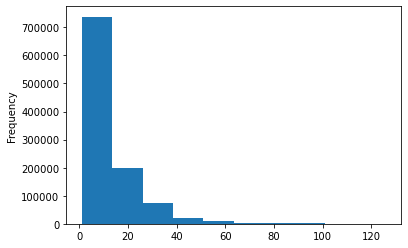

In [473]:
data_df.Comments.apply(lambda x: len(x.split())).plot(kind='hist')

In [474]:
data_df['Comments'] = data_df['Comments'].str.replace("[^a-zA-Z0-9]"," ")

In [475]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [462]:
data_df['Comments'] = data_df['Comments'].apply(lambda x: [x for x in x.strip() if x not in stop_words])

In [481]:
data_df.Comments = data_df.Comments.apply(lambda x: " ".join([y.lower() for y in x.split() if y not in stop_words]))

In [482]:
data_df.head()

,Comments,Category,label
0,i feel like replacing hemsworth would terrible...,Astrology,3
1,it s going to kick off in may 2020,Astrology,3
2,sorry,Astrology,3
3,phase 4 starts 2020,Astrology,3
4,corona darling idea whats possible,Astrology,3


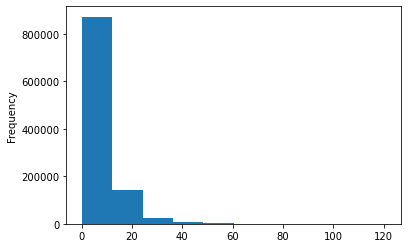

In [484]:
data_df.Comments.apply(lambda x: len(x.split())).plot(kind='hist')

In [533]:
data_df.fillna("NA",inplace=True)

In [543]:
data_df[['Comments','label']].to_csv('processed_data.csv',index=False)

In [544]:
data_df.head()

,Comments,Category,label
0,i feel like replacing hemsworth would terrible...,Astrology,3
1,it s going to kick off in may 2020,Astrology,3
2,sorry,Astrology,3
3,phase 4 starts 2020,Astrology,3
4,corona darling idea whats possible,Astrology,3


In [545]:
pd.read_csv('./processed_data.csv')

,Comments,label
0,i feel like replacing hemsworth would terrible...,3
1,it s going to kick off in may 2020,3
2,sorry,3
3,phase 4 starts 2020,3
4,corona darling idea whats possible,3
...,...,...
1047052,bitchhhhhhhhhh actually travelled economy i love,5
1047053,beautiful place thank sharing video,5
1047054,she looked stunning went mosque,5
1047055,i jealous life i live videos lol,5


In [546]:
from torchtext import data 
import torch
import torchtext

In [547]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [548]:
device

device(type='cuda')

In [549]:
TEXT = data.Field(tokenize='spacy',
                  sequential=True,
        include_lengths=True,
           lower = True,
         batch_first = True,
          )

LABEL = data.LabelField(dtype=torch.long, batch_first = True)

/opt/conda/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/conda/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [550]:
fields = [('Comments',TEXT) , ('label',LABEL)]

In [551]:
training_data = data.TabularDataset(path ='./processed_data.csv', format='csv',fields=fields, skip_header = True)

/opt/conda/lib/python3.7/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)
/opt/conda/lib/python3.7/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('Example class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.', UserWarning)


In [552]:
print(vars(training_data.examples[0])['Comments'])

['i', 'feel', 'like', 'replacing', 'hemsworth', 'would', 'terrible', 'idea']


In [553]:
for idx in range(len(training_data)):
    if len(vars(training_data.examples[0])['Comments'])<=0:
        print(idx,vars(training_data.examples[0]))

In [746]:
import random
train_data , valid_data = training_data.split(split_ratio= 0.9,stratified= True, strata_field='label',random_state = random.seed(42))

In [820]:
TEXT.build_vocab(train_data , min_freq = 1, vectors="glove.6B.300d")
LABEL.build_vocab(train_data)

In [821]:
len(TEXT.vocab) , len(LABEL.vocab)

(214228, 23)

In [822]:
# Commonly used words
print(TEXT.vocab.freqs.most_common(10))

[('i', 343020), ('like', 72547), ('love', 71406), ('video', 47366), ('the', 44689), ('movie', 38696), ('one', 37007), ('you', 36666), ('good', 36257), ('it', 28679)]


In [823]:
train_iter , valid_iter = data.BucketIterator.splits((train_data,valid_data), batch_size = 8, sort_key = lambda x: len(x.Comments),sort_within_batch=True, device=device)

/opt/conda/lib/python3.7/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.
  warnings.warn('{} class will be retired in the 0.8.0 release and moved to torchtext.legacy. Please see 0.7.0 release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [851]:
import torch.nn as nn 

class ClassifierNET(nn.Module):
    def __init__(self, vocab_size , embd_dim , hidden_dim , output_dim, n_layers , bidirectional ,dropout ,pad_idx):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embd_dim ,  padding_idx = pad_idx)
        self.lstm = nn.LSTM(embd_dim , hidden_dim, num_layers = n_layers ,bidirectional=bidirectional , dropout =dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        self.activation = nn.Sigmoid()
        self.max_length = 300
#     def forward(self, text, len_text):
#         embedded = self.embedding(text) # [batch_size , sent_len , embd_dim]

#         pached_embd = nn.utils.rnn.pack_padded_sequence(embedded , len_text, batch_first=True)
        
#         packed_output , (hidden, cell) = self.lstm(pached_embd)
        
#         # [batch_size , num_layers* num_dir , hid dim]
#         hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim = 1)
        
#         dense_outputs = self.fc(hidden)
        
#         outputs = self.activation(dense_outputs)
        
#         return outputs
    
    def forward(self, x, seq_lengths):
        # Clamp everything to minimum length of 1, but keep the original variable to mask the output later
        seq_lengths_clamped = seq_lengths.clamp(min=1, max=self.max_length)
        x_packed = torch.nn.utils.rnn.pack_padded_sequence(x, seq_lengths_clamped, 
                                                           enforce_sorted=False, batch_first=True)  
        out_packed, hidden = self.lstm(x_packed)
        # hidden is of the shape num_layers * num_directions, batch, hidden_size
        hidden = hidden.view(self.num_layers, 2, -1, self.hidden_dim)        

        # SOME TRANSFORMATIONS HERE
        # get the last element i.e from the last layer, rearrange shape to be batch, num_directions, hidden_size
        hidden = hidden[-1].permute(1, 0, 2)
        # since it's bidirectional, we combine both outputs from last layer
        hidden = hidden.reshape(-1, 2 * self.hidden_dim)

       # MASKING HERE
        # mask everything that had seq_length as 0 in input as 0
        hidden.masked_fill_((seq_lengths == 0).view(-1, 1), 0)
        return hidden

In [825]:
# hyperparameters

size_of_vocab = len(TEXT.vocab)
embd_dim = 300
num_layers = 2
num_hidden_nodes = 32
num_output_nodes = len(LABEL.vocab)
bidirectional = False
dropout = 0.5

In [826]:
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

In [852]:
model = ClassifierNET(size_of_vocab, embd_dim , num_hidden_nodes , num_output_nodes , num_layers, bidirectional, dropout,PAD_IDX)

In [853]:
print(model)

ClassifierNET(
  (embedding): Embedding(214228, 300, padding_idx=1)
  (lstm): LSTM(300, 32, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=64, out_features=23, bias=True)
  (activation): Sigmoid()
)


In [854]:
pretrained_embeddings = TEXT.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.1329,  0.1699, -0.1436,  ..., -0.2378,  0.1477,  0.6290],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [855]:

UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(embd_dim)
model.embedding.weight.data[PAD_IDX] = torch.zeros(embd_dim)

In [856]:
import torch.optim as optim
optimizer =  optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.StepLR(optimizer,1, gamma=0.9)

In [857]:
def categorical_accuracy(pred, y):
    maxpreds = pred.argmax(dim=1, keepdim=True)
    correct = maxpreds.squeeze(1).eq(y)
    return correct.sum()/torch.FloatTensor([y.shape[0]]).to(device)

In [858]:
model = model.to(device)
criterion = criterion.to(device)

In [859]:
device

device(type='cuda')

In [860]:
def train(model, iterator, optimizer, criterion, scheduler):

    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # set the model in training phase
    model.train()

    for batch in iterator:

        # resets the gradients after every batch
        optimizer.zero_grad()

        # retrieve text and no. of words
        text, text_lengths = batch.Comments

        # convert to 1D tensor
        predictions = model(text, text_lengths).squeeze()

        # compute the loss
        loss = criterion(predictions, batch.label)

        # compute the binary accuracy
        acc = categorical_accuracy(predictions, batch.label)

        # backpropage the loss and compute the gradients
        loss.backward()

        # update the weights
        optimizer.step()

        #loss and accuracy
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    scheduler.step()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [861]:
def evaluate(model, iterator, criterion):

    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()

    # deactivates autograd
    with torch.no_grad():

        for batch in iterator:

            # retrieve text and no. of words
            text, text_lengths = batch.Comments

            # convert to 1d tensor
            predictions = model(text, text_lengths).squeeze()

            # compute loss and accuracy
            loss = criterion(predictions, batch.label)
            acc = categorical_accuracy(predictions, batch.label)

            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [862]:
epochs = 5 

best_valid_loss = float('inf')

for epoch in range(epochs):
    train_loss , train_acc = train(model, train_iter, optimizer, criterion, scheduler)
    valid_loss , valid_acc = evaluate(model, valid_iter, optimizer, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'best_model.pt')
    
    print(f'Epoch ==> {epoch}')
    print(f'\tTrain Loss: {train_loss:.2f} || Train Accuracy: {train_acc*100:.2f}%')
    print(f'\tValid Loss: {valid_loss:.2f} || Valid Accuracy: {valid_acc*100:.2f}%')

ModuleAttributeError: 'ClassifierNET' object has no attribute 'rnn'

In [ ]:
import spacy 
nlp = spacy.load('en')

def predict(model, sentence):
    tokenized = [sent.text for sent in nlp.tokenize(sentence)]
    indexed = [TEXT.vocab.stoi[x] for x in tokenized]
    length = [len(indexed)]
    tensor = tensor.unsqueezed(1).T
    length_tensor  = torch.LongTensor(length)
    preds = model(tensor, length_tensor)
    max_preds  = preds.argmax(dim = 1)
    return max_preds.item()

In [ ]:
from sklearn.metrics import classification_report